In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df = pd.read_csv(boston_url)

In [7]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [11]:
boston_df['CHAS'].median() 

0.0

In [14]:
boston_df.CHAS.unique()

array([0., 1.])

In [18]:
##Is there a difference in Median values of houses (MEDV)
## for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
boston_df.loc[(boston_df['AGE']<84),'age_group']='Prior 1940'
from statsmodels.formula.api import ols
lm= ols('MEDV~age_group',data=boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

              df        sum_sq    mean_sq   F  PR(>F)
age_group    0.0      0.000000        NaN NaN     NaN
Residual   287.0  17559.458299  61.182782 NaN     NaN


In [19]:
##•	Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
##of non-retail business acres per town? (Pearson Correlation)

In [59]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [61]:
#Conclusion:Since P_value> 0.05 so we fail to reject the null hypothses that there is no 
#relationship between between Nitric oxide concentrations and proportion 
#of non-retail business acres per town.

In [21]:
##What is the impact of an additional weighted distance to the five 
##Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [22]:
X=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                   1.52e-146
Time:                        18:48:02   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Conclusion: P_Value is greater than 0.05 so we fail to reject the null hypothesis that
## there is impact of an additional weighted distance to the five 
##Boston employment centres on the median value of owner occupied homes.
## R2 (Cooeficient of determination): tells us that 73.2% of the variables are explained by the model
## F-statistic:	1380.( model is significant since at least one of the coeffient is greter than 0)
## DIS	4.7985: only 4.7 additional weighted distance to the five Boston employment centres is impact on
##the median value of owner occupied homes>


In [23]:
##Is there a significant difference in median value 
##of houses bounded by the Charles river or not? (T-test for independent samples)

In [26]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']=='1']['MEDV'],   
                      boston_df[boston_df['CHAS']=='0']['MEDV'],equal_var=True)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [27]:
## •	Provide a bar plot for the Charles river variable

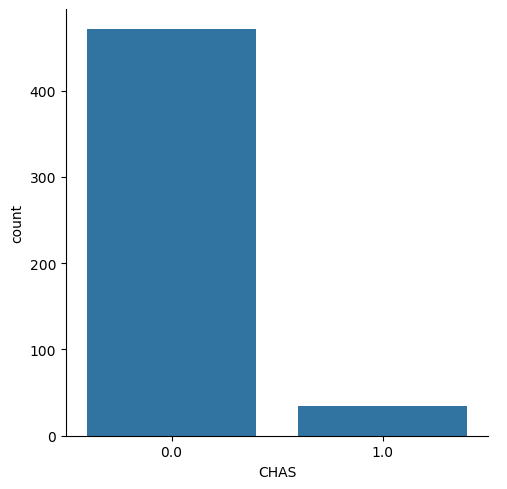

In [31]:
ax=sns.catplot(x='CHAS',kind='count',data=boston_df)

In [32]:
##Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of
#35 years and younger, 
#between 35 and 70 years and
#70 years and older)

In [37]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)& (boston_df['AGE']<70) ,'age_group']='Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'


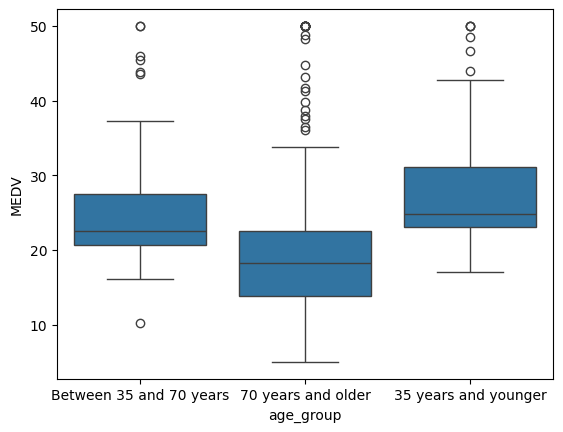

In [38]:
ax=sns.boxplot(x='age_group',y='MEDV',data=boston_df)

In [39]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of
## non-retail business acres per town. What can you say about the relationship?

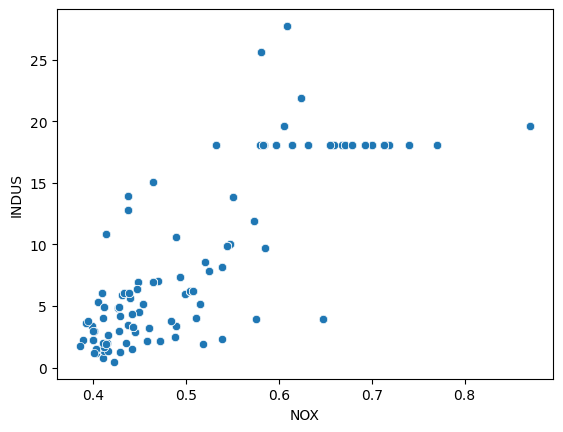

In [44]:
ax=sns.scatterplot(x='NOX',y='INDUS',data=boston_df)


In [ ]:
##Conclusion: Nitric oxide concentration is more between 0 to 10 proportion of
##non-retail business acres per town.relationship is positive because it is upword sloping.

In [45]:
##Create a histogram for the pupil to teacher ratio variable

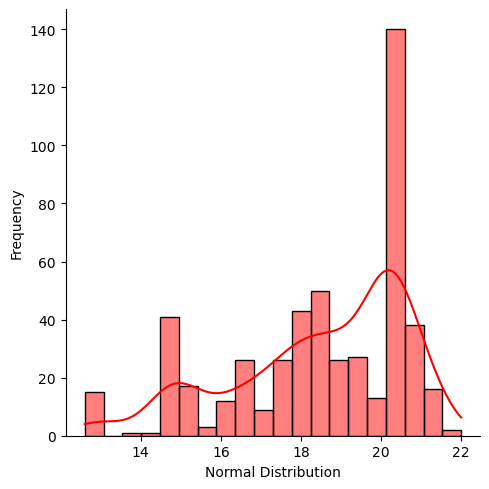

In [58]:
ax=sns.displot(boston_df['PTRATIO'],
                bins=20,
                 kde=True,
                color='red')

ax.set(xlabel='Normal Distribution',ylabel='Frequency')